## Import necessary libraries

In [9]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
sb.set()

# For data splitting
from sklearn.model_selection import train_test_split

# For resampling
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

## Helper functions for additional factors

In [5]:
# Determine if a student performed well
def performedWell(value):
    if value >= 15:
        return 1
    else:
        return 0
    
# Determine if student has a big family (>3 family size), returns 1 if true & 0 otherwise
def bigFam(value):
    if value == "GT3":
        return 1
    else:
        return 0

# Determine whether the student has at least one educated parent (i.e. level 4 education)
def atLeast1EduParent(medu, fedu):
    if medu == 4 or fedu == 4:
        return 1
    else:
        return 0

# Determine whether the student's parents have a large education gap (i.e. >=2 level gap)
def parentEduGap(medu, fedu):
    gap = abs(medu - fedu)
    if gap >= 2:
        return 1
    else: 
        return 0
    
# Determine whether the student's parents are living together or apart
def cohabitationStatus(value):
    if value == 'T':
        return 1
    else:
        return 0
    
# Determine whether the student's parents are employed
def employed(value):
    if value == "at_home":
        return 0
    else:
        return 1
    
# Determine whether the student has a good relationship with their family (i.e. >= level 3)
def goodRelation(value):
    if value >= 3:
        return 1
    else:
        return 0
    
# Change yes & no to '1' & '0', respectively (for consistency)
def famSupport(value):
    if value == "yes":
        return 1
    else:
        return 0

## Adding relevant factors

In [6]:
# Read the CSV file into a DataFrame
df = pd.read_csv("aligned_student_data.csv")

# Apply performed_well function to 'G3' column and create a new column 'PerformedWell'
df['PerformedWell'] = df['G3'].apply(performedWell)

# Apply bigFam function to 'famsize' column and create a new column 'BigFamily'
df['BigFamily'] = df['famsize'].apply(bigFam)

# Apply atLeast1EduParent function to 'Medu' and 'Fedu' columns and create a new column 'AtLeast1EducatedParent'
df['AtLeast1EducatedParent'] = df.apply(lambda row: atLeast1EduParent(row['Medu'], row['Fedu']), axis=1)

# Apply parentEduGap function to 'Medu' and 'Fedu' columns and create a new column 'ParentEducationGap'
df['ParentEducationGap'] = df.apply(lambda row: parentEduGap(row['Medu'], row['Fedu']), axis=1)

# Apply cohabitation_status function to 'Pstatus' column and create a new column 'ParentsLivingTogether'
df['ParentsLivingTogether'] = df['Pstatus'].apply(cohabitationStatus)

# Apply employed function to 'Mjob' and 'Fjob' columns and create new columns "M_employed" and "F_employed" respectively
df['M_employed'] = df['Mjob'].apply(employed)
df['F_employed'] = df['Fjob'].apply(employed)

# Apply goodRelation function to 'famrel' column and create a new column 'GoodFamilyRelationship'
df['GoodFamilyRelation'] = df['famrel'].apply(goodRelation)

# Apply famSupport function to 'famsup' column and create a new column 'SupportedByFamily'
df['SupportedByFamily'] = df['famsup'].apply(famSupport)

# Save the DataFrame with the new column back to a CSV file
df.to_csv("aligned_student_data.csv", index=False)

In [7]:
df = df.filter(["BigFamily", "ParentsLivingTogether", "AtLeast1EducatedParent", "ParentEducationGap", "M_employed", "F_employed", "SupportedByFamily", "GoodFamilyRelation", "PerformedWell"], axis=1)
df.head()

,BigFamily,ParentsLivingTogether,AtLeast1EducatedParent,ParentEducationGap,M_employed,F_employed,SupportedByFamily,GoodFamilyRelation,PerformedWell
0,1,0,1,0,0,1,0,1,0
1,1,1,0,0,0,1,1,1,0
2,0,1,0,0,0,1,0,1,0
3,1,1,1,1,1,1,1,1,0
4,1,1,0,0,1,1,1,1,0


## Data Splitting

In [10]:
# Split the dataframe into predicators and response
X, y = df.iloc[: , :-1], df.iloc[: , -1]

# Since the dataset is smaller, split the dataset into 60% training and 40% test set
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.6, random_state = 20)

In [11]:
print("Proportion of students who perfomed well and did not perform well:")
print("Performed well vs Did not perform well")
print(y_train.value_counts()[1], 'vs', y_train.value_counts()[0])

Proportion of students who perfomed well and did not perform well:
Performed well vs Did not perform well
78 vs 311


Above shows that the data is imbalanced.
Hence, we decided to use the resampling technique to solve this issue

## Save train and test data as CSV, respectively

In [31]:
# Create a DF for the training data
train_df = pd.concat([X_train, y_train], axis=1)
train_df.to_csv('train.csv')

# Create a DF for the test data
test_df = pd.concat([X_test, y_test], axis = 1)
test_df.to_csv('test.csv')

## Oversampling using SMOTE

In [32]:
# Perform oversampling using SMOTE
smote = SMOTE(random_state = 42)
X_oversampled, y_oversampled = smote.fit_resample(X_train, y_train)

# Concatenate X and y arrays for oversampled data
oversampled_student_data = pd.concat([pd.DataFrame(X_oversampled, columns = X.columns), pd.DataFrame(y_oversampled, columns = ['PerformedWell'])], axis = 1)

oversampled_student_data.head()

,BigFamily,ParentsLivingTogether,AtLeast1EducatedParent,ParentEducationGap,M_employed,F_employed,SupportedByFamily,GoodFamilyRelation,PerformedWell
0,0,0,0,0,1,1,1,1,0
1,0,1,1,1,1,1,0,1,0
2,1,0,1,0,1,1,1,1,1
3,1,0,0,0,1,1,0,1,0
4,1,1,0,0,1,1,0,1,1


In [14]:
print("After oversampling: ")
print("Performed well vs Did not perform well")
print(y_oversampled.value_counts()[1], 'vs', y_oversampled.value_counts()[0])

After oversampling: 
Performed well vs Did not perform well
311 vs 311


## Undersampling using RandomUnderSampler

In [33]:
# Perform undersampling using RandomUnderSampler
undersampler = RandomUnderSampler(random_state = 42)
X_undersampled, y_undersampled = undersampler.fit_resample(X_train, y_train)

# Concatenate X and y arrays for undersampled data
undersampled_student_data = pd.concat([pd.DataFrame(X_undersampled, columns = X.columns), pd.DataFrame(y_undersampled, columns = ['PerformedWell'])], axis = 1)

undersampled_student_data.head()

,BigFamily,ParentsLivingTogether,AtLeast1EducatedParent,ParentEducationGap,M_employed,F_employed,SupportedByFamily,GoodFamilyRelation,PerformedWell
478,1,1,0,0,0,1,1,1,0
324,1,1,0,0,0,1,0,1,0
25,1,1,0,0,1,1,1,0,0
256,1,1,0,0,1,0,1,1,0
131,1,1,0,0,1,1,1,1,0


In [17]:
print("After undersampling: ")
print("Performed well vs Did not perform well")
print(y_undersampled.value_counts()[1], 'vs', y_undersampled.value_counts()[0])

After undersampling: 
Performed well vs Did not perform well
78 vs 78


## Save resampled data as CSV

In [35]:
# Save oversampled and undersampled datasets into new CSV files
oversampled_student_data.to_csv('oversampled_student_data.csv', index = False)
undersampled_student_data.to_csv('undersampled_student_data.csv', index = False)

## Visualing resampled data vs original data

Text(0.5, 0, 'Undersampled Performedwell')

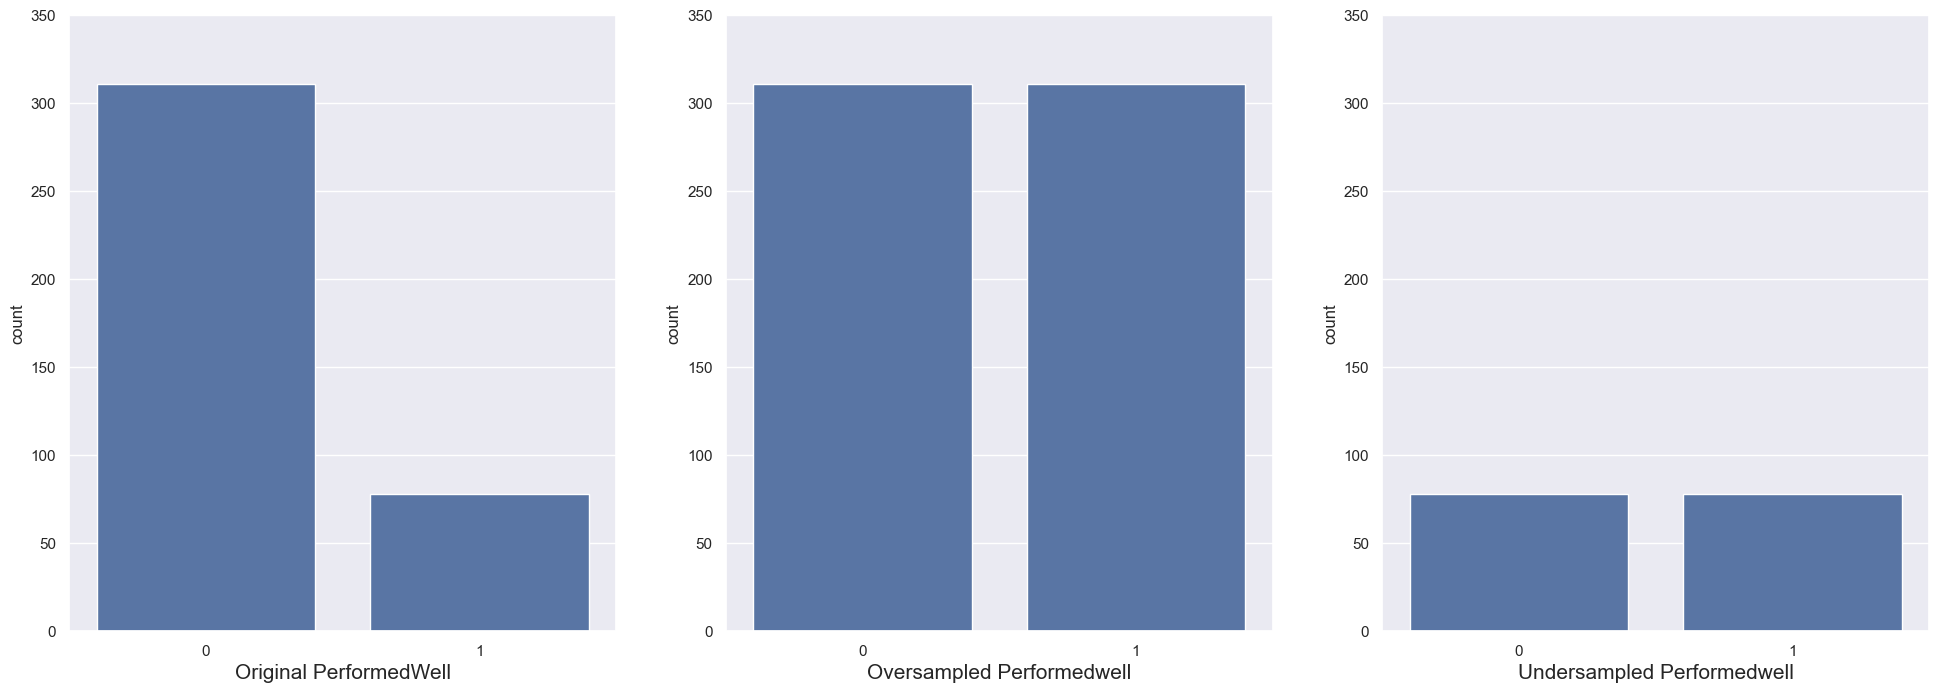

In [27]:
fig, axes = plt.subplots(1, 3, figsize = (24, 8))
plt.setp(axes, ylim = (0, 350))

# Plotting original data
sb.countplot(x=train_df['PerformedWell'], ax = axes[0])
ax = axes[0]
ax.set_xlabel("Original PerformedWell", fontsize = 15)

# Plotting resampled data (oversampled)
sb.countplot(x=oversampled_student_data['PerformedWell'], ax = axes[1])
ax = axes[1]
ax.set_xlabel("Oversampled Performedwell", fontsize = 15)

# Plotting resampled data (undersampled)
sb.countplot(x=undersampled_student_data['PerformedWell'], ax = axes[2])
ax = axes[2]
ax.set_xlabel("Undersampled Performedwell", fontsize = 15)

After resampling, we can see that the imbalanced between students who did and did not perform well has been taken care of and the ratio is more balanced as compared to the original data.